# Project 3: Measuring Stellar Elemental Abundance
By Jenna Bittner, Nathan Holty, and Hannah Eggenschwiler

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as c

## Notes Provided for Project 3
### Sodium 5890 and 5896 doublet arises from the 3p - 3s transition:
See image provided of the transition

Solar spectrum is from: http://bass2000.obspm.fr/solar_spect.php

In [ ]:
spec = astropy.io.ascii.read("solar_spectrum.txt")

Text(0, 0.5, 'Normalized Flux')

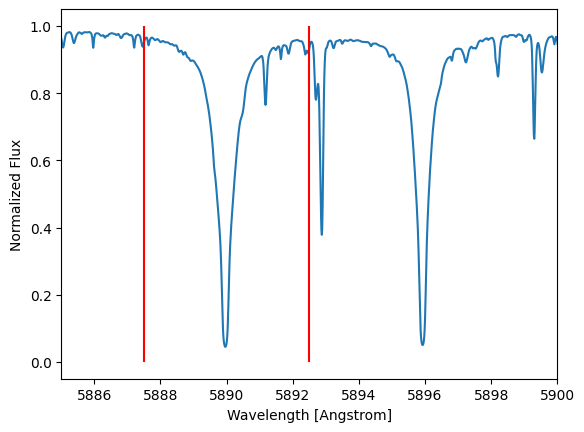

In [ ]:
plt.plot(spec["col1"], spec["col2"] / 1e4)
#plt.vlines(5887.5, 0, 10000, color="red")
#plt.vlines(5892.5, 0, 10000, color="red")
plt.vlines(5887.5, 0, 1, color="red")
plt.vlines(5892.5, 0, 1, color="red")
plt.xlim(5885, 5900)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

In [ ]:
ind = np.where((spec["col1"] < 5892.5) & (spec["col1"] > 5887.5))
inc = np.median(np.diff(spec["col1"][ind]))
ew = np.sum(1e4 - spec["col2"][ind]) * inc / 1e4
print("equivalent width (ew) = ", ew, " Angstrom")

equivalent width (ew) =  0.8346720000182191  Angstrom


### Now find the number of Na atoms in absorbing state based on the following curve of growth plot:
Given the Equivalent width and the Wavelength of soudium on the left. We can find the Number of atoms (N) in the equation on the x-axis.

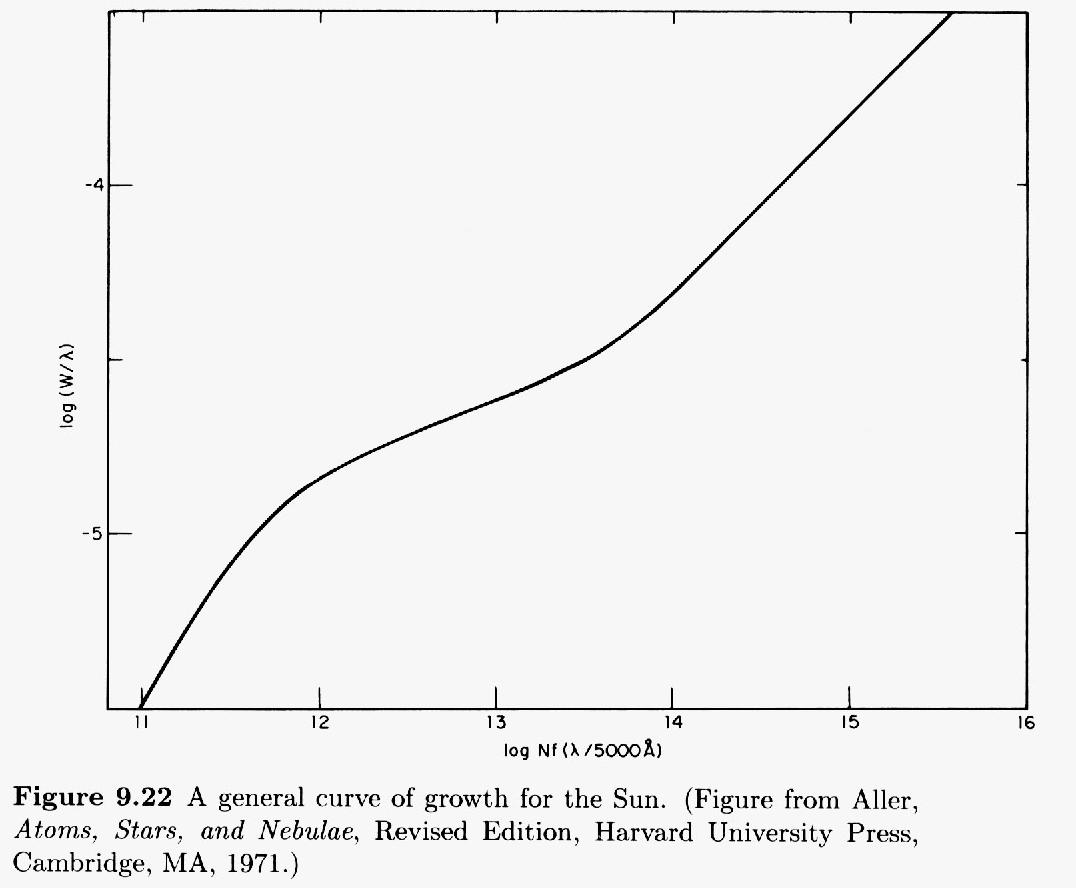

In [ ]:
# Wavelength of Sodium is 5890.0 A
np.log10(ew / 5890.0)

np.float64(-3.8485994499231455)

In [ ]:
# Number of absorbing atoms
10**14.8 / 0.65 / (5890 / 5000) / 1e14

8.240268309784437

log(W/$\lambda$) = log(0.83 / 5890) = -3.85, where W is equivalent width.

The corresponding value on x-axis is log(Nf($\lambda/5000\overset{\circ}{A}$))$\sim$14.8.

Rearranged, we have N = $8.24\times10^{14}$ with the unit of atoms/cm$^2$, assuming f = 0.65, where f is the oscillator strength for this transition at 5890 $\overset{\circ}{A}$.

### A good tutorial of Boltzmann and Saha equation can be found here:
http://personal.psu.edu/rbc3/A501/saha.pdf

http://faculty.tamuc.edu/cbertulani/ast/lectures/Lec7.pdf

http://people.physics.tamu.edu/belyanin/astr314/lecture8.pdf

### Further reading:
1. Formation of Sodium lines in solar spectrum: https://www.chem.uci.edu/~unicorn/249/Handouts/RWFSodium.pdf
2. Nomenclature of electron energy levels: https://www.dummies.com/education/science/chemistry/how-to-represent-electrons-in-an-energy-level-diagram/
3. https://www.chemicool.com/definition/degenerate.html
4. Saha equation: https://www.youtube.com/watch?v=MFqrF2izvgs

## Steps to take:
1. Measure the equivalent width of one of the solar sodium (Na) doublet lines.
2. Find the number density of Na atoms in the ground state based on the following curve of growth plot.
3.  Estimate the ratio of sodium atoms in the ground state to sodium atoms in excited states using the Boltzmann equation.
4.  Estimate the ratio of neutral sodium atoms to ionized sodium atoms using the Saha equation.
5.  Compute the total column density of sodium atoms in the sun's photosphere bases on the above two ratios and the measured Na number density in the ground state.
6.  The column density of hydrogen atoms is about $6.6\times10^{23}$; what is the abundance of sodium relative to hydrogen, in both physicists’ and astronomers’ terminology.


## 1. What is the number density of Na atoms in the ground state?

Estimate the ratio of sodium atoms in the ground state to sodium atoms in excited states using the Boltzmann equation:

$\frac{N_2}{N_1} = \frac{g_2}{g_1}\exp\left({-\frac{E_2 - E_1}{kT}}\right)$, where subscripts 1 and 2 refer to 3s and 3p states, $N$ is number density, $g$ is the number of separate, individual states that are degenerate in energy, $E$ is energy at the state, $k$ is Boltzmann constant, and $T$ is temperature.

In [ ]:
g1 = 2 # Degeneracy of 3s state
g2 = 6 # Degeneracy of 3p state
E1 = -5.14 * u.eV # Energy 3s
E2 = -3.04 * u.eV # Energy 3p
T = 5778 * u.K # Typical temperature in the solar photosphere
k_B_eV = c.k_B.to(u.eV / u.K) # Convert Boltzmann constant to eV/K

# Compute the ratio N2/N1 using the Boltzmann equation
N2_N1 = (g2 / g1) * np.exp(-(E2-E1) / (k_B_eV * T))

print("The ratio of sodium atoms in the excited state (3p) to those in the ground state (3s) is ", N2_N1)
print("This means that for every sodium atom in the excited state, there are about", 1 / N2_N1 , "atoms in the ground state")

The ratio of sodium atoms in the excited state (3p) to those in the ground state (3s) is  0.044200397169173775
This means that for every sodium atom in the excited state, there are about 22.62423109395541 atoms in the ground state


## 2. What is the number density of neutral Na atoms?

Estimate the ratio of neutral sodium atoms to ionized sodium atoms. You will use the Saha equation:

$\frac{Na_{II}}{Na_{I}} = \frac{2kT}{P_e} \frac{Z_{II}}{Z_I} \left(\frac{2\pi m_e kT}{h^2}\right)^{3/2}\exp{\left(-\frac{\chi}{kT}\right)}$, where $m_e$ is electron mass, partition function $Z_I = 2.4$ and  $Z_{II} = 1.0$, electron pressure $P_e = n_e kT = 1.0 N\cdot m^{-2}$, and the ionization energy $\chi = 5.1$ eV. Note that the values given are for the sodium line only. Other lines have different values.

In [ ]:
# Given constants
Pe = 1.0 * u.N / u.m**2 # Electron pressure in N/m²
Z_I = 2.4  # Partition function for neutral Na
Z_II = 1.0  # Partition function for ionized Na
chi = 5.1 * u.eV  # Ionization energy in eV
chi_J = chi.to(u.J) # Chi in Joules

# Compute the ratio N_NaII / N_NaI using the Saha equation
NaII_NaI = ((2 * c.k_B.to(u.N * u.m* u.K**-1) * T) / Pe) * (Z_II / Z_I) * ((2 * np.pi * c.m_e * c.k_B * T) / (c.h**2))**(3/2) * np.exp(-chi_J / (c.k_B * T))

print("The ratio of ionized sodium atoms to the neutral sodium atoms is", NaII_NaI)
print("This means that for every ionized sodium atom, there are about", 1 / NaII_NaI , "neutral sodium atoms")

The ratio of ionized sodium atoms to the neutral sodium atoms is 2510.751135753122 m3 kg(3/2) / (J(3/2) s3)
This means that for every ionized sodium atom, there are about 0.0003982871841657222 neutral sodium atoms


m3 kg(3/2) / (J(3/2) s3) is unitless

## 3. What is the number density of ionized Na atoms?

In [ ]:
print("The ratio of ionized sodium atoms to the neutral sodium atoms is", NaII_NaI)
print("This means that for every neutral sodium atom, there are about", NaII_NaI , "ionized sodium atoms")

The ratio of ionized sodium atoms to the neutral sodium atoms is 2510.751135753122 m3 kg(3/2) / (J(3/2) s3)
This means that for every neutral sodium atom, there are about 2510.751135753122 m3 kg(3/2) / (J(3/2) s3) ionized sodium atoms


## 4. What is the total number density of Na atoms in all states?

Compute the total column density of sodium atoms in the sun's photosphere, assuming the total number of sodium atoms equals to:
$N_{1} \times (1+\frac{N_2}{N_1}) \times (1+\frac{Na_{II}}{Na_{I}}$). $N_1$ is measured from the curve of growth. The last two terms have been calculated in question 1 and 2.

In [ ]:
# From the curve of growth number of atoms in absorbing state was found to be N = 8.24×10^14 with units of atoms/cm^2
N1 = 8.24e14

# Total Number of Sodium Atoms
Na_total = N1 * (1 + N2_N1) * (1 + NaII_NaI)

print("The total number density of sodium atoms in all states is", Na_total, "atoms/cm^2")

The total number density of sodium atoms in all states is 2.1611637436398717e+18 atoms/cm^2


## 5. What is the relative abundance for Na to H, in NNa/NH and [Na/H]?
The column density of hydrogen atoms is about $6.6\times10^{23}$:
What is the abundance of sodium relative to hydrogen?
In astronomers' term, we set log relative abundance for Hydrogen at 12. Abundances of other elements are expressed as: $12 + log_{10}(N_{element}/N_{H})$, where N is in mole or number density. For example, in solar atmosphere, $N_{He}/N_{H}\sim1/10$ and therefore log abundance for He is $\sim$11. More precisely, 10.93 according to: https://par.nsf.gov/servlets/purl/10036398.

In [ ]:
# Column density of Hydrogen atoms is 6.6x10^23 with units of atoms/cm^2
N_H = 6.6e23

rel_abundance_NatoH = Na_total / N_H
print("Relative abundance of Sodium to Hydrogen is:", rel_abundance_NatoH, "atoms/cm^2")

Relative abundance of Sodium to Hydrogen is: 3.274490520666472e-06 atoms/cm^2


In [ ]:
Na_amu = 23
H_amu = 1

log_rel_abundance_NatoH = 12 + np.log10(Na_total * Na_amu / N_H * H_amu)
print("In astronomers' terms the log relative abundance of Sodium to Hydrogen is:", log_rel_abundance_NatoH)

In astronomers' terms the log relative abundance of Sodium to Hydrogen is: 7.876871573543689


To further illustrate results, here are some additional graph ideas:

1. **Boltzmann Distribution Visualization**  
   - A plot showing the fraction of sodium atoms in different energy states as a function of temperature.  
   - X-axis: Temperature (K), Y-axis: Fraction of atoms in ground/excited states.  
   - Helps illustrate how population levels shift with temperature.

2. **Saha Equation Visualization**  
   - A plot showing the ionization fraction of sodium as a function of temperature.  
   - X-axis: Temperature (K), Y-axis: N_(Na II) / N_(Na I).  
   - Helps explain at what temperatures sodium is mostly ionized.

3. **Bar Chart of Na Abundance in Different States**  
   - Compare the number densities of sodium in different states: ground state N_1, excited state N_2, neutral sodium N_(Na I), and ionized sodium N_(Na II).  
   - Helps visually compare the relative populations.

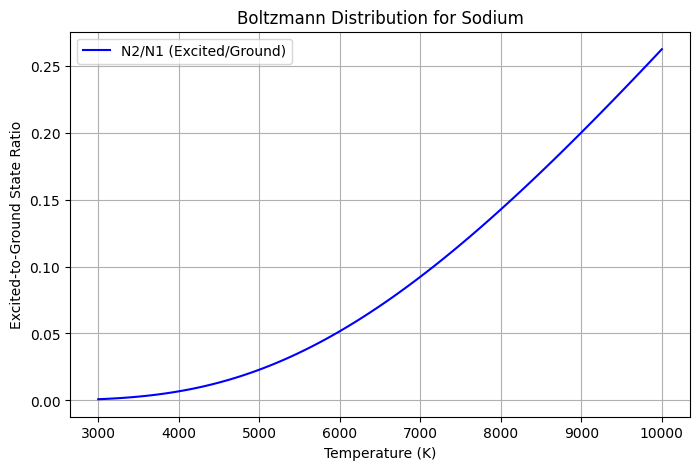

In [ ]:
# Define constants
k_B = c.k_B.to(u.eV / u.K).value  # Boltzmann constant in eV/K
T_range = np.linspace(3000, 10000, 100)  # Temperature range in Kelvin

# Boltzmann Distribution Visualization
E1 = -5.14  # Energy of 3s state (eV)
E2 = -3.04  # Energy of 3p state (eV)
g1, g2 = 2, 6  # Degeneracies of 3s and 3p
N2_N1 = (g2 / g1) * np.exp(-(E2 - E1) / (k_B * T_range))

plt.figure(figsize=(8, 5))
plt.plot(T_range, N2_N1, label="N2/N1 (Excited/Ground)", color='b')
plt.xlabel("Temperature (K)")
plt.ylabel("Excited-to-Ground State Ratio")
plt.title("Boltzmann Distribution for Sodium")
plt.legend()
plt.grid()
plt.show()

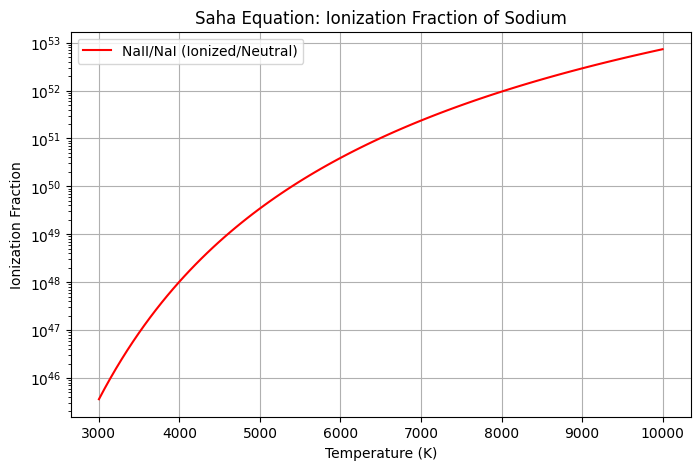

In [ ]:
# Saha Equation Visualization
Pe = 1.0  # Electron pressure in N/m²
Z_I, Z_II = 2.4, 1.0  # Partition functions
chi = 5.1  # Ionization energy in eV

NaII_NaI = ((2 * k_B * T_range) / Pe) * (Z_II / Z_I) * ((2 * np.pi * c.m_e.value * k_B * T_range) / (c.h.value**2))**(3/2) * np.exp(-chi / (k_B * T_range))

plt.figure(figsize=(8, 5))
plt.plot(T_range, NaII_NaI, label="NaII/NaI (Ionized/Neutral)", color='r')
plt.yscale("log")
plt.xlabel("Temperature (K)")
plt.ylabel("Ionization Fraction")
plt.title("Saha Equation: Ionization Fraction of Sodium")
plt.legend()
plt.grid()
plt.show()

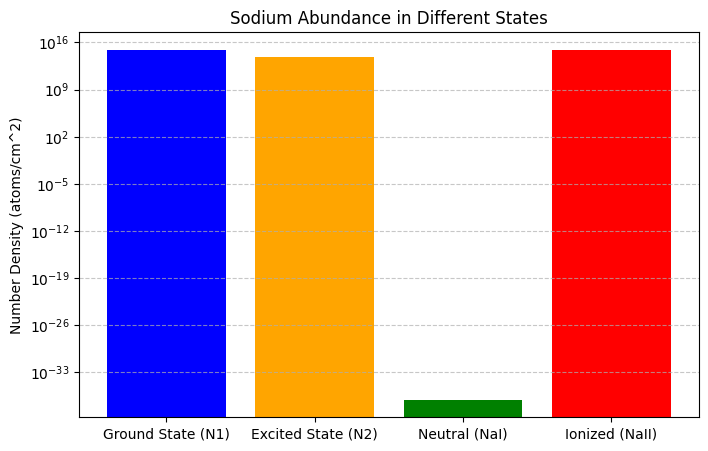

In [ ]:
# Bar Chart of Na Abundance in Different States
N1 = 8.24e14  # Ground state Na density (atoms/cm^2)
N2 = N1 * np.mean(N2_N1)  # Excited state density
NaI = N1 / (1 + np.mean(NaII_NaI))  # Neutral Na density
NaII = NaI * np.mean(NaII_NaI)  # Ionized Na density

labels = ["Ground State (N1)", "Excited State (N2)", "Neutral (NaI)", "Ionized (NaII)"]
values = [N1, N2, NaI, NaII]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
plt.yscale("log")
plt.ylabel("Number Density (atoms/cm^2)")
plt.title("Sodium Abundance in Different States")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. **Curve of Growth Plot**  
   - A log-log plot of equivalent width vs. column density of sodium.  
   - Illustrates how absorption features grow depending on sodium abundance.

5. **Sodium-to-Hydrogen Abundance Ratio**  
   - A histogram comparing solar sodium abundance to hydrogen, and optionally to other elements like Mg, Fe.  
   - Emphasizes how sodium is relatively rare in the Sun compared to hydrogen.

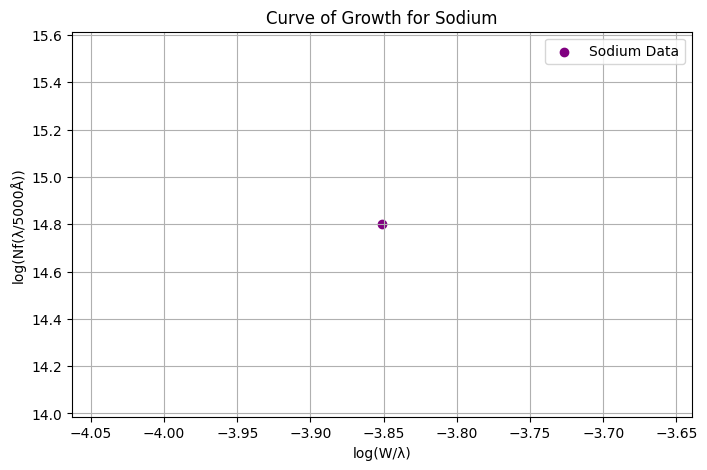

In [ ]:
# Curve of Growth Plot
W_lambda = np.log10(0.83 / 5890)  # Equivalent width to wavelength ratio (log scale)
Nf_lambda = 14.8  # Log column density from curve of growth

plt.figure(figsize=(8, 5))
plt.scatter(W_lambda, Nf_lambda, color='purple', label='Sodium Data')
plt.xlabel("log(W/λ)")
plt.ylabel("log(Nf(λ/5000Å))")
plt.title("Curve of Growth for Sodium")
plt.legend()
plt.grid()
plt.show()

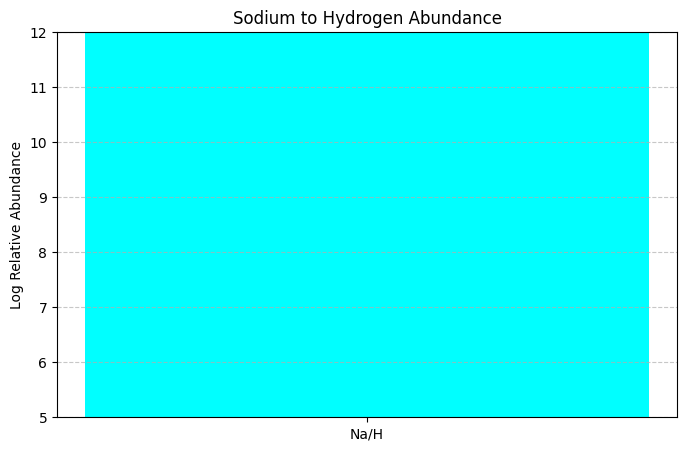

In [ ]:
# Sodium to Hydrogen Abundance Ratio Plot
N_H = 6.6e23  # Hydrogen column density (atoms/cm^2)
Na_total = N1 * (1 + np.mean(N2_N1)) * (1 + np.mean(NaII_NaI))
rel_abundance_Na_H = Na_total / N_H
log_rel_abundance_Na_H = 12 + np.log10(rel_abundance_Na_H)

plt.figure(figsize=(8, 5))
plt.bar(["Na/H"], [log_rel_abundance_Na_H], color='cyan')
plt.ylabel("Log Relative Abundance")
plt.title("Sodium to Hydrogen Abundance")
plt.ylim(5, 12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 6. Bonus, can you apply the method to a different line, e.g., Fe, Mg, Si?
Try a different line from a different element, e.g., Mg, Si, or Fe, and see how close you can get to the solar value and explain the difference.